In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [3]:
from load_db import db

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [4]:
jj_counter = defaultdict(int)

for (j1,) in cnt['fj']:
    
    for (c2,j2),count2 in cnt['c.fj'].items():
        
        # undirected edges
        if j1 >= j2:
            continue
        
        if (c2,j1) not in cnt['c.fj']:
            continue
            
        count1 = cnt['c.fj'][(c2,j1)]
        cc = count1 * count2
        
        jj_counter[(j1,j2)] += cc

NameError: name 'cnt' is not defined

In [15]:
# cosine similarity
jmag = {j: np.sqrt(
    np.sum([
        count**2
        for (_,fj),count in cnt['c.fj'].items() 
        if fj==j
    ])
) for (j,) in cnt['fj']}

In [19]:
from csv import writer
with open('data/jj_net.csv', 'w', encoding='utf8') as cf:
    w = writer(cf)
    w.writerow(['Source','Target','weight'])
    for (j1,j2),c in jj_counter.items():
        w.writerow([j1,j2,c / (jmag[j1]*jmag[j2])])

## very slow method

In [20]:
# demonstration of the slow way to do it

net = {}

to_fill = 10
filled = 0

for j1 in db.items('fj'):
    print(j1)
    for j2 in db.items('fj'):
        print(j2)
        if j1 >= j2:
            continue

        a = db(fj=j1, c=None).cits
        a = a.set_index('c')

        b = db(fj=j2, c=None).cits
        b = b.set_index('c')

        myg = a.multiply(b, fill_value=0)['count']

        cc = np.sum(myg) / (np.linalg.norm(a)*np.linalg.norm(b))
        
        net[(j1,j2)] = cc
        filled += 1
        
        if filled >= to_fill:
            break

    if filled >= to_fill:
        break

acta sociologica
acta sociologica
american journal of economics and sociology
loading variable sociology-wos-74b/ind ___ c.fj from disk
american journal of sociology
american sociological review
annals of tourism research
anthrozoos
archives europeennes de sociologie
armed forces & society
british journal of sociology
british journal of sociology of education
canadian journal of sociology-cahiers canadiens de sociologie


## much faster method

In [21]:
jj_counter = defaultdict(int)

for j1 in db.items('fj'):
    
    for (c2,j2),count2 in jc.items():
        
        # undirected edges
        if j1 >= j2:
            continue
        
        if (c2,j1) not in jc:
            continue
            
        count1 = jc[(c2,j1)]
        cc = count1 * count2
        
        jj_counter[(j1,j2)] += cc

In [22]:
# cosine similarity

# magnitudes of each
jmag = {j: np.sqrt(
    np.sum([
        count**2
        for (_,fj),count in jc.items() 
        if fj==j
    ])
) for j in db.items('fj')}

In [23]:
from csv import writer
with open('jj_net.csv', 'w', encoding='utf8') as cf:
    w = writer(cf)
    w.writerow(['Source','Target','weight'])
    for (j1,j2),c in jj_counter.items():
        w.writerow([j1,j2,c / (jmag[j1]*jmag[j2])])

In [24]:
x = db(fj='social forces', fy=2012, c=None).cits

loading variable sociology-wos-74b/ind ___ c.fj.fy from disk


# yearly slices of journal structure?

In [25]:
jc = db.by('c','fj','fy').docs

loading variable sociology-wos-74b/doc ___ c.fj.fy from disk


In [26]:
jj_counter = defaultdict(int)

for j1 in db.items('fj'):
    
    for (c2,j2,y2),count2 in jc.items():
        
        # undirected edges
        if j1 >= j2:
            continue
        
        if (c2,j1,y2) not in jc:
            continue
            
        count1 = jc[(c2,j1,y2)]
        cc = count1 * count2
        
        jj_counter[(j1,j2,y2)] += cc

In [ ]:
# individual files
for YY in range(1960,2010,5):
    
    yys = range(YY,YY+5)

    # cosine similarity
    jmag = {j: np.sqrt(
        np.sum([
            count**2
            for (_,fj,fy),count in jc.items() 
            if fj==j and fy in yys
        ])
    ) for j in db.items('fj')}

    from csv import writer
    
    with open('jj_net_%s.csv' % YY, 'w', encoding='utf8') as cf:
        w = writer(cf)
        w.writerow(['Source','Target','weight'])
        
        collapse = defaultdict(int)
        for (j1,j2,y), c in jj_counter.items():
            if y not in yys:
                continue
                
            collapse[(j1,j2)] += c
        
        for (j1,j2),c in collapse.items():
            w.writerow([j1,j2,c / (jmag[j1]*jmag[j2])])

In [ ]:
from csv import writer        

with open('jj_net_TIME.csv', 'w', encoding='utf8') as cf:
    w = writer(cf)
    w.writerow(['Source','Target','weight','when_start','when_end'])

    # individual files
    for YY in range(1960,2020,5):

        yys = range(YY,YY+5)

        # cosine similarity
        jmag = {j: np.sqrt(
            np.sum([
                count**2
                for (_,fj,fy),count in jc.items() 
                if fj==j and fy in yys
            ])
        ) for j in db.items('fj')}

        collapse = defaultdict(int)
        for (j1,j2,y), c in jj_counter.items():
            if y not in yys:
                continue
                
            collapse[(j1,j2)] += c
        
        for (j1,j2),c in collapse.items():
            w.writerow([j1,j2,c / (jmag[j1]*jmag[j2]), YY, YY+5])

In [ ]:
jmag['acta sociologica']

In [28]:
net = pd.read_csv('jj_net_TIME.csv')

## first determine overall arrangement

In [29]:
G = nx.Graph()

for i,r in net.iterrows():
    if r.weight < 0.05:
        continue
    G.add_edge(r.Source, r.Target, weight=r.weight)

In [30]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=3.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2181.19it/s]


BarnesHut Approximation  took  0.14  seconds
Repulsion forces  took  0.55  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


c:\users\amcga\envs\citation-deaths\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


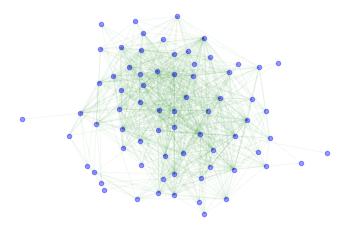

In [31]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
save_lim = (plt.xlim(), plt.ylim())
plt.show()

In [32]:
save_lim

((-709.3400524058903, 1026.7468588062975),
 (-651.7181507530615, 374.2519458636645))

## now plot subsets

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


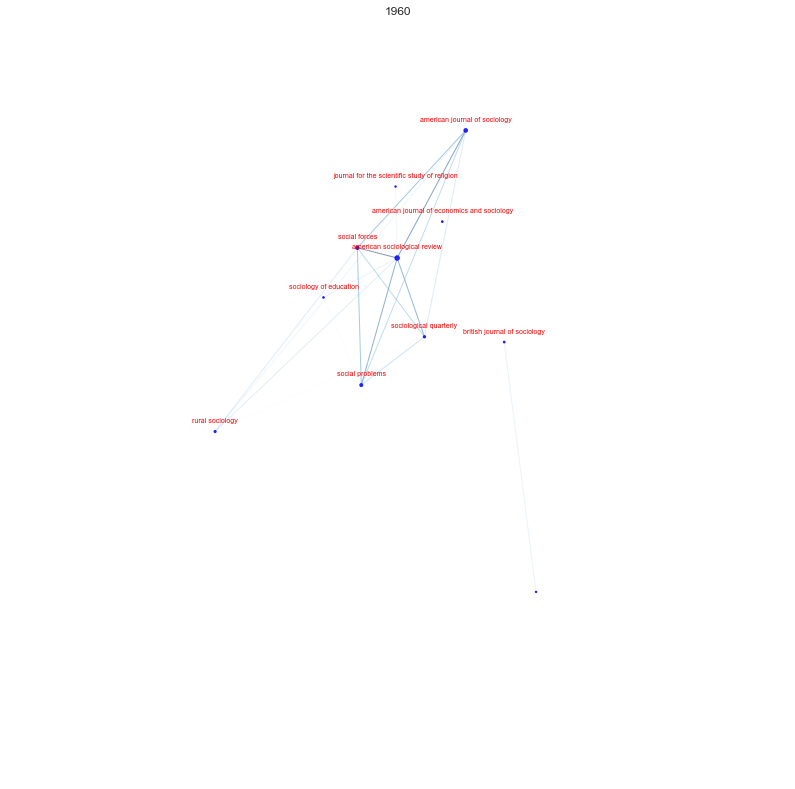

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


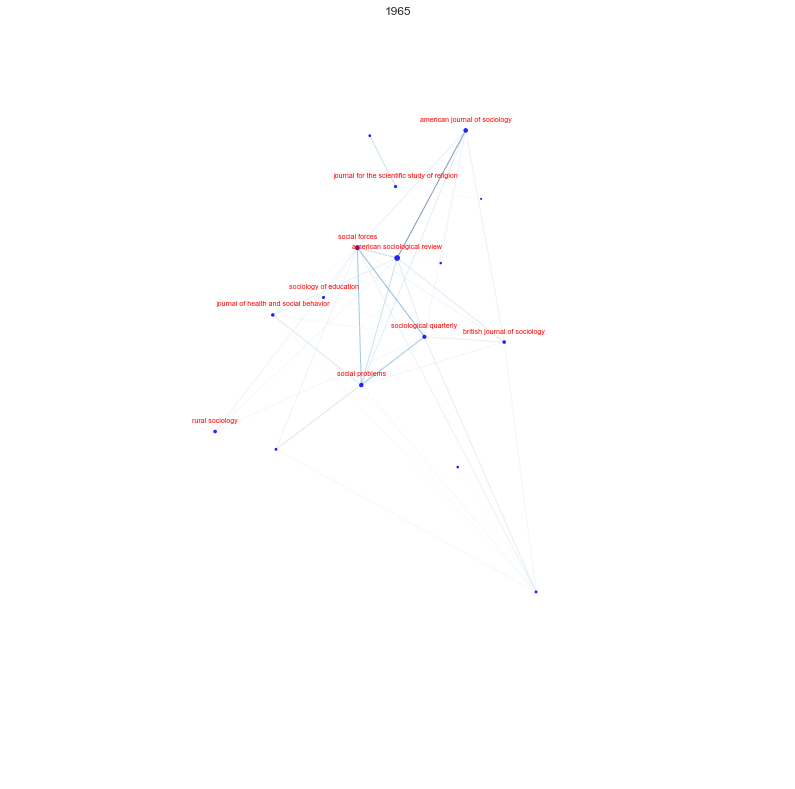

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


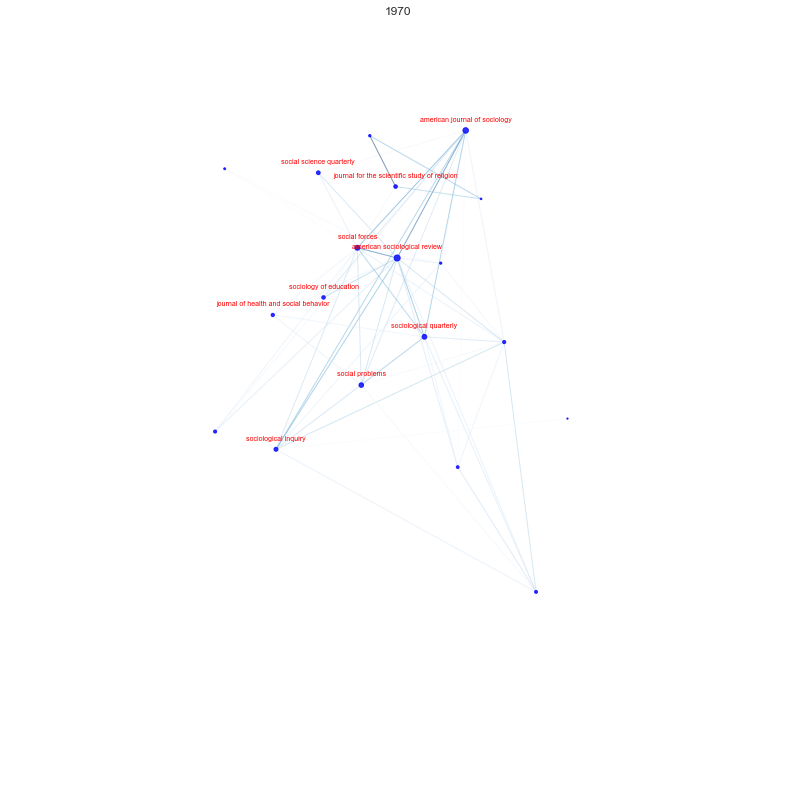

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


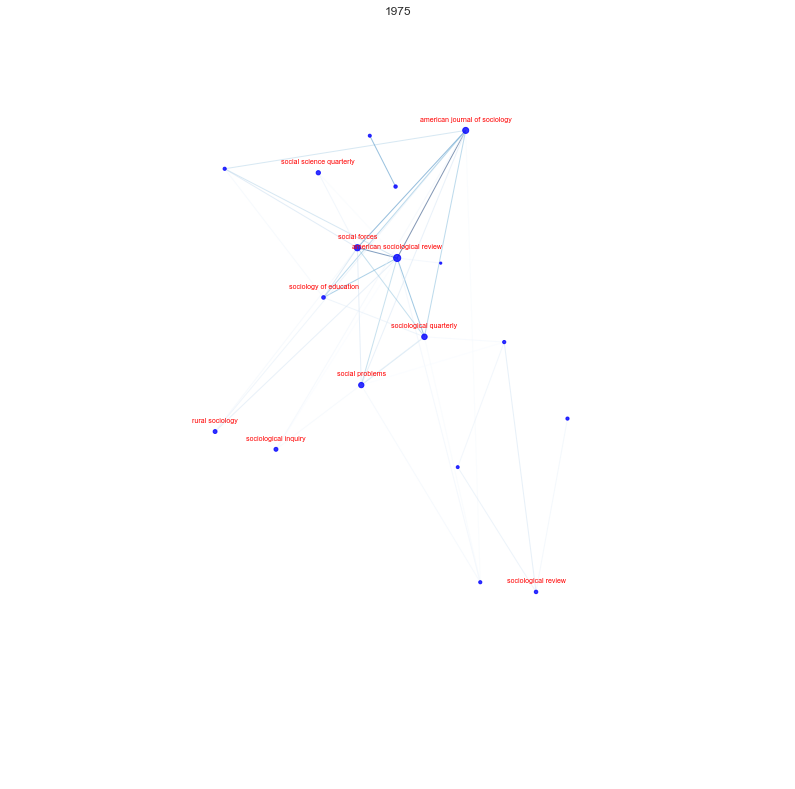

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


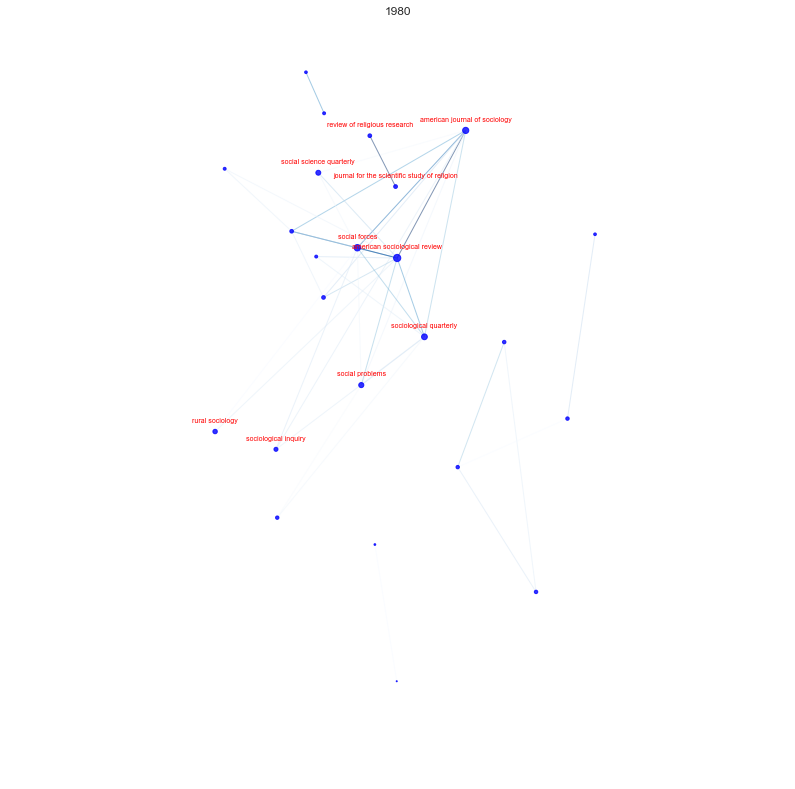

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


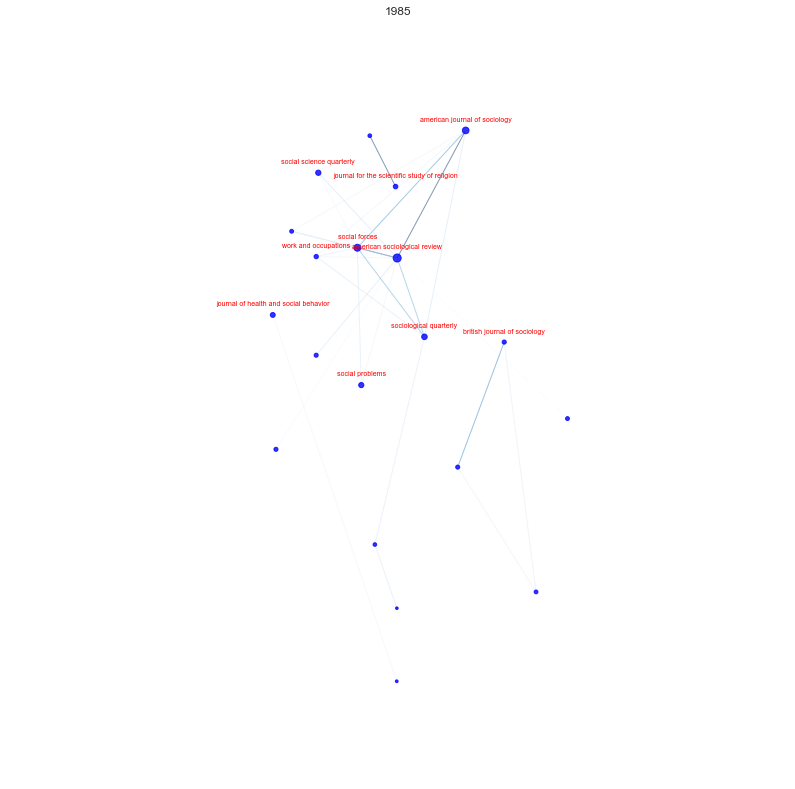

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


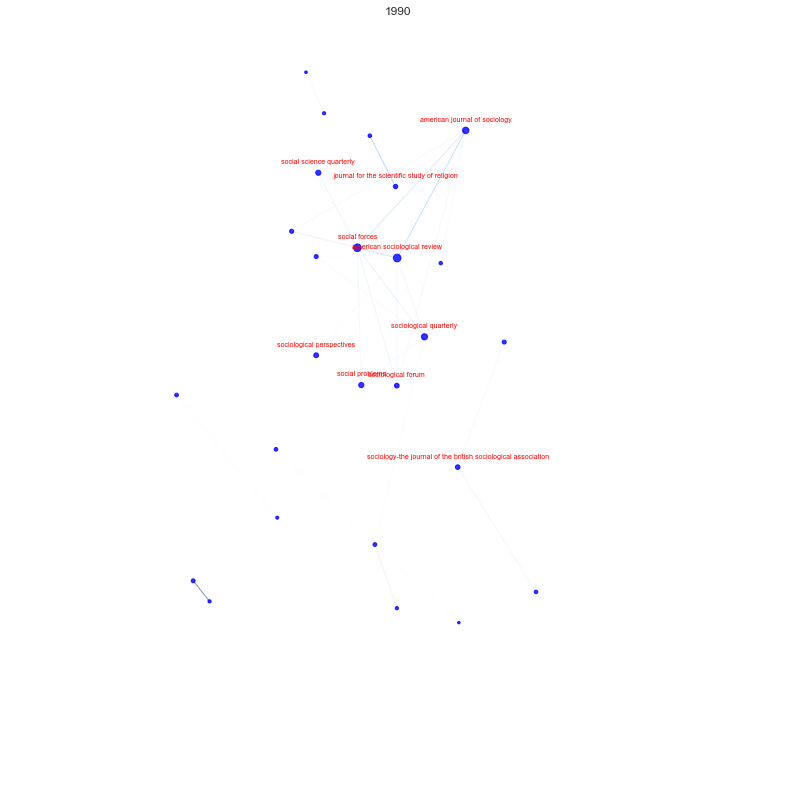

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


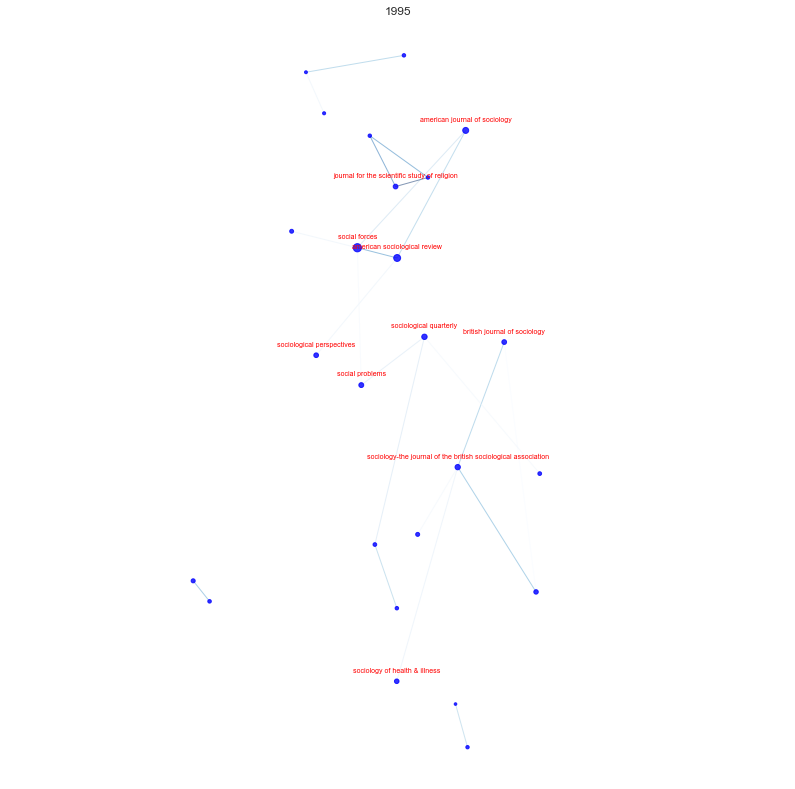

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


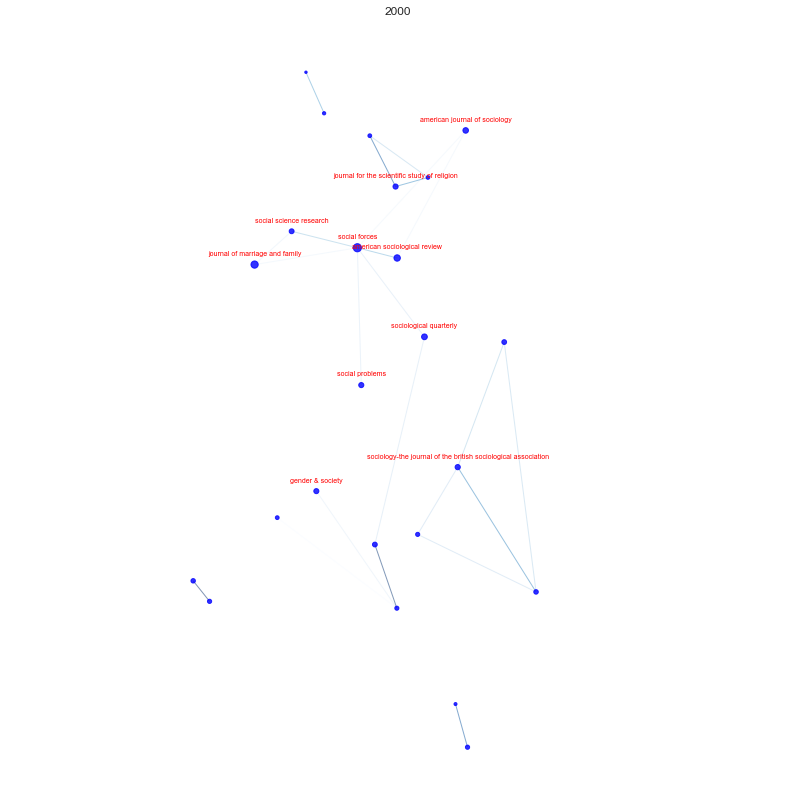

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


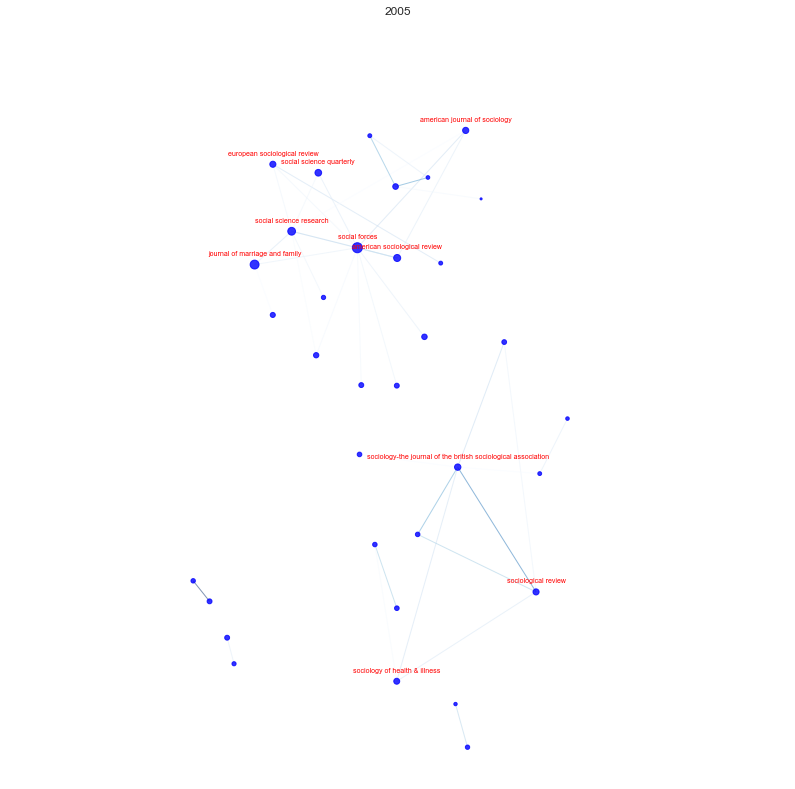

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


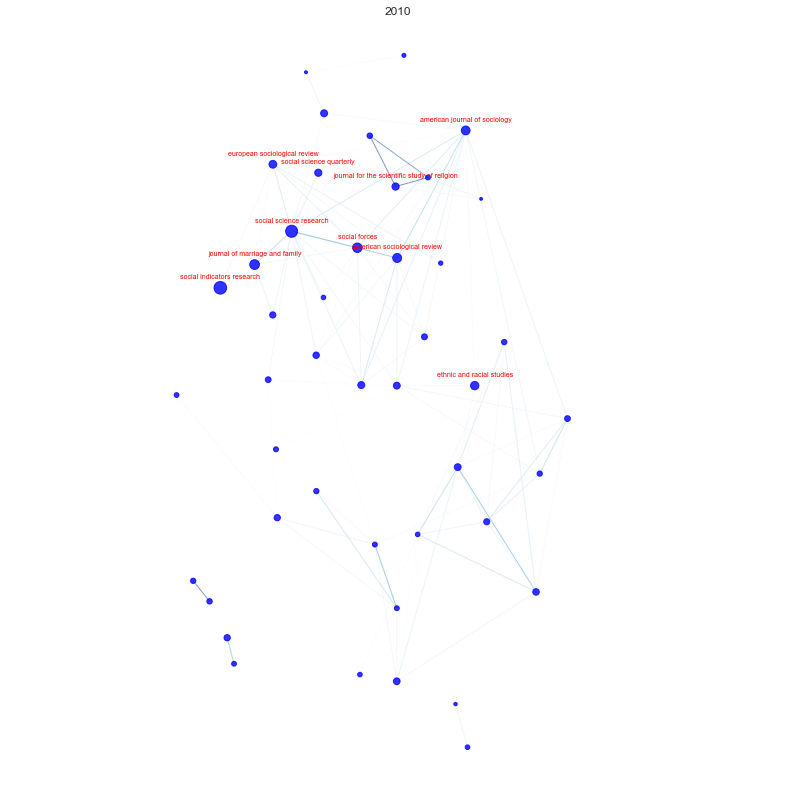

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


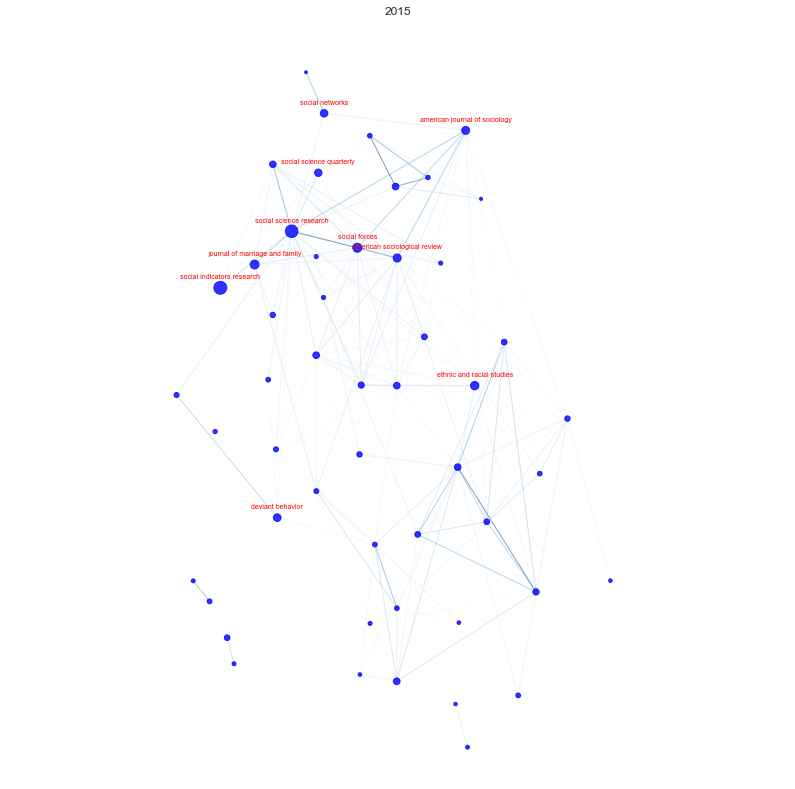

In [35]:
smax_orig = None

for YY in range(1960,2020,5):

    G = nx.Graph()
    for i,r in net[net.when_start==YY].iterrows():
        if r.weight < 0.10:
            continue
            
        G.add_edge(r.Source, r.Target, weight=r.weight)

    zero_deg = [n for n,c in dict(nx.degree(G)).items() if c == 0]
    zero_deg = [x for x in zero_deg if x in positions]
    nonzero_deg = [n for n,c in dict(nx.degree(G)).items() if c != 0]
    #G.remove_nodes_from(zero_deg)
    
    plt.figure(figsize=(14,14))
    
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    sizes = {x: sum([db(fy=yyy, fj=x).cits for yyy in range(YY,YY+5)]) for x in zero_deg+nonzero_deg}
    
    if smax_orig is None:
        smax_orig = max(sizes.values())

    nx.draw_networkx_nodes(G, positions, nodelist=zero_deg, node_size=[sizes[x]*20/smax_orig for x in zero_deg], with_labels=False, node_color="black", alpha=1)
    nx.draw_networkx_nodes(G, positions, nodelist=nonzero_deg, node_size=[sizes[x]*20/smax_orig for x in nonzero_deg], with_labels=False, node_color="blue", alpha=0.8)
    
    nx.draw_networkx_edges(G, positions, edges=edges, edge_color=weights, alpha=0.5, edge_cmap=plt.cm.Blues)

    #ss = list(zip(*[(e,w) for e,w in nx.get_edge_attributes(G,'weight').items() if w>0.15]))
    #if len(ss):
    #    sedges,sweights = ss
    #    nx.draw_networkx_edges(G, positions, edgelist=sedges, edge_color=list(sweights), alpha=1)
        
    #top10 = Counter(dict(nx.degree(G, weight='weight'))).most_common(10)
    #top10 = [x[0] for x in top10]
    
    top10 = sorted(nonzero_deg, key=lambda x:-sizes[x])[:10]
    
    pos_higher = {}
    y_off = 15  # offset on the y axis
    for k, v in positions.items():
        pos_higher[k] = (v[0], v[1]+y_off)
    
    labels = {k:k for k in top10}
    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(G,pos_higher,labels,font_size=7,font_color='r')
    
        
    plt.title(YY)
    plt.axis('off')
    plt.xlim(*save_lim[0])
    plt.ylim(*save_lim[1])
    
    db.save_figure('net.%s.png' % YY)
    
    plt.show()

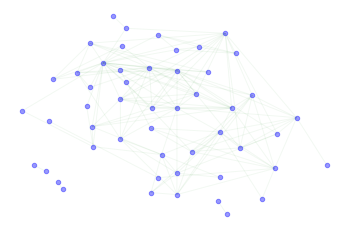

In [36]:
nx.draw_networkx_nodes(G, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

In [37]:
display(Markdown("""
To get a better sense of the substantive intellectual connections between the {njournals} sociology journals I have chosen, 
    I have used a bibliometric coupling network (see Figure A1d). 
I draw a connection between two journals based on how similar their references are. 
This network contains a large connected component of 44 journals with similar citation practices, 
    including the journals which most sociologists would intuitively consider as the centers of gravity for the discipline. 
In the core of this connected group 
    American Sociological Review, Social Forces, and American Journal of Sociology are tightly connected in terms of what they reference. 
The only other similarly strong triad is between 
    Sociological Review, British Journal of Sociology, and Sociology: The Journal of the British Sociological Association. 
There is little direct connection between these two triads. 
The 29 journals outside this connected component are devoted to more specific subfields, 
    e.g. Teaching Sociology, Language in Society, Journal of Health and Social Behavior, Leisure Sciences, and Sociology of Sport. 
For a full summary of these journals, see Appendix 1.
""".format(**locals())))


To get a better sense of the substantive intellectual connections between the 73 sociology journals I have chosen, 
    I have used a bibliometric coupling network (see Figure A1d). 
I draw a connection between two journals based on how similar their references are. 
This network contains a large connected component of 44 journals with similar citation practices, 
    including the journals which most sociologists would intuitively consider as the centers of gravity for the discipline. 
In the core of this connected group 
    American Sociological Review, Social Forces, and American Journal of Sociology are tightly connected in terms of what they reference. 
The only other similarly strong triad is between 
    Sociological Review, British Journal of Sociology, and Sociology: The Journal of the British Sociological Association. 
There is little direct connection between these two triads. 
The 29 journals outside this connected component are devoted to more specific subfields, 
    e.g. Teaching Sociology, Language in Society, Journal of Health and Social Behavior, Leisure Sciences, and Sociology of Sport. 
For a full summary of these journals, see Appendix 1.
